In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os
import seaborn as sns
import glob
import natsort

In [2]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [3]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):

        if "LN" in path: continue
        if "WD" in path: continue
        if "FCs" in path: continue
        if "G1" in path: continue
        if "Mean" in path: continue
        if "gs1" in path: continue
        if "gs2" in path: continue
        if "gs3" in path: continue
        if "gs5" in path: continue
        if "gs6" in path: continue
        if "gs7" in path: continue
        if "gs8" in path: continue

        if "gs" in path and (("gs444" not in path) and ("gs445" not in path) and ("gs446" not in path) and ("gs447" not in path) and ("gs448" not in path)): continue        
        if "hs" in path: continue
        if "Mask" in path: continue
        if "Mask" in path: continue
        if "LR001" in path: continue
        

        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "vanilla"

        names = [4441, 4442, 4443, 4445, 4448, 44410,
                 4451, 4452, 4453, 4455, 4458, 44510,
                 4461, 4462, 4463, 4465, 4468, 44610,
                 44713, 44715, 44723, 44725, 
                 44813, 44815, 44823, 44825]
        names = names[::-1]
        if "gs" in path:
            flag = 1
            for name in names:
                if "gs" + str(name) in path:
                    # if name == 44410: print("Ya")
                    data["Scaling"] = name
                    flag = 0
                    break
            if flag == 1:
                continue
        if len(data_) == 0: 
            # print(path)
            data_ = data
        else: 
            # print(path)
            data_ = pd.concat([data_, data])
    return data_

In [4]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")

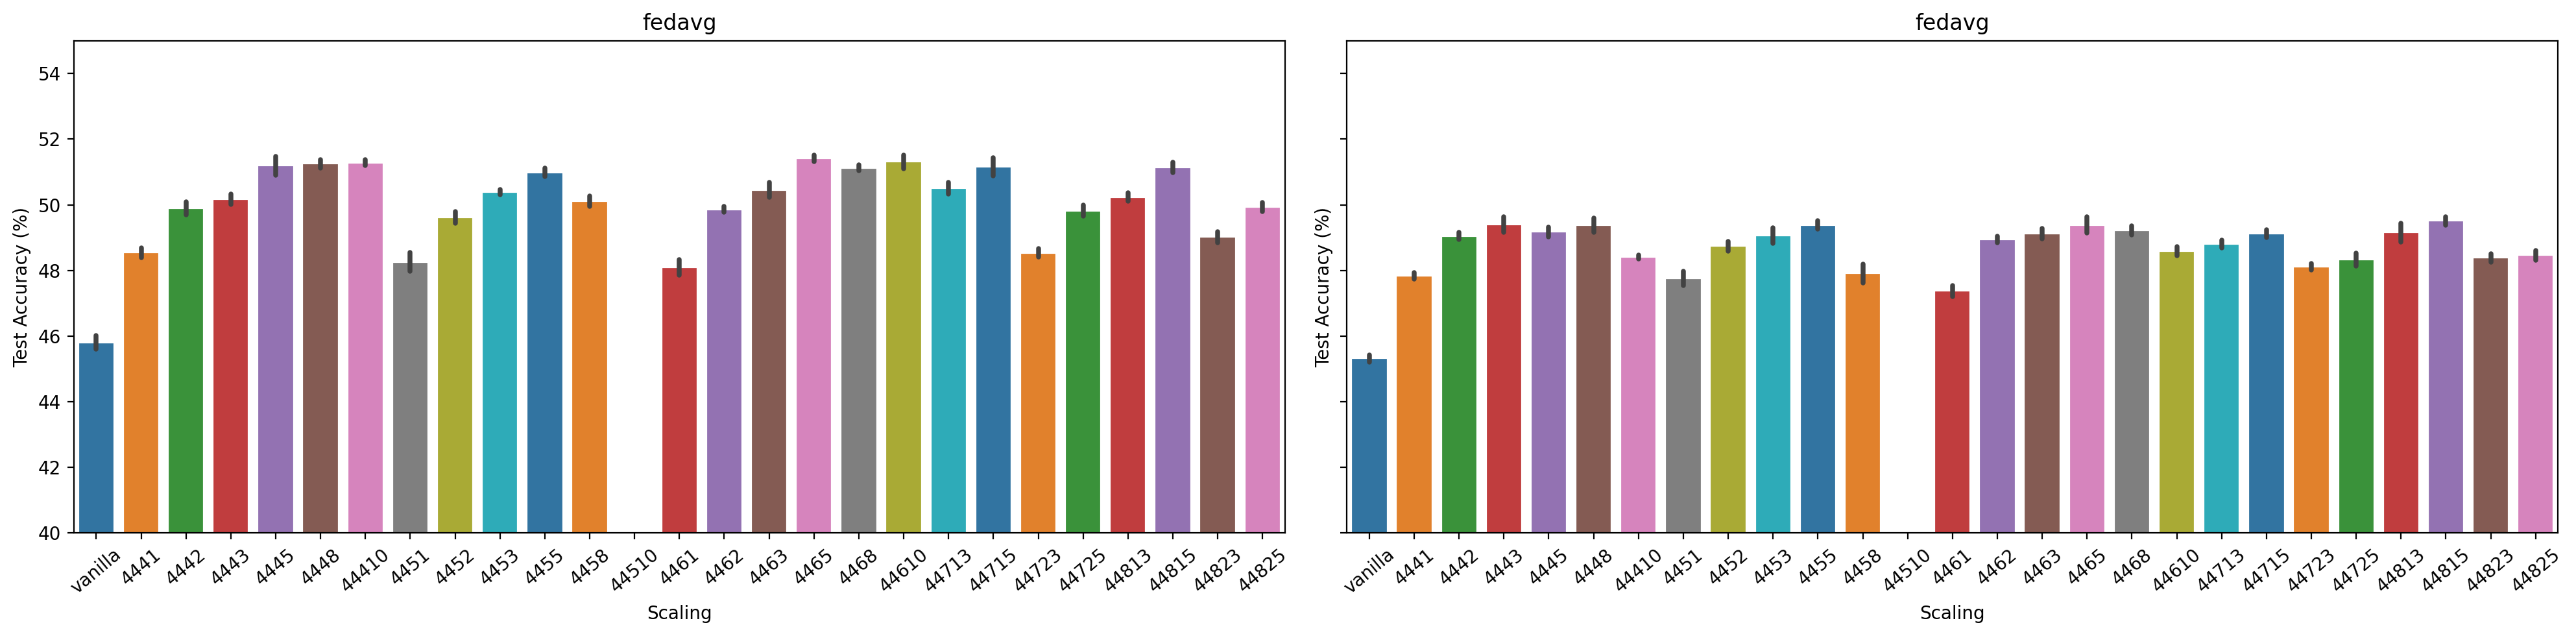

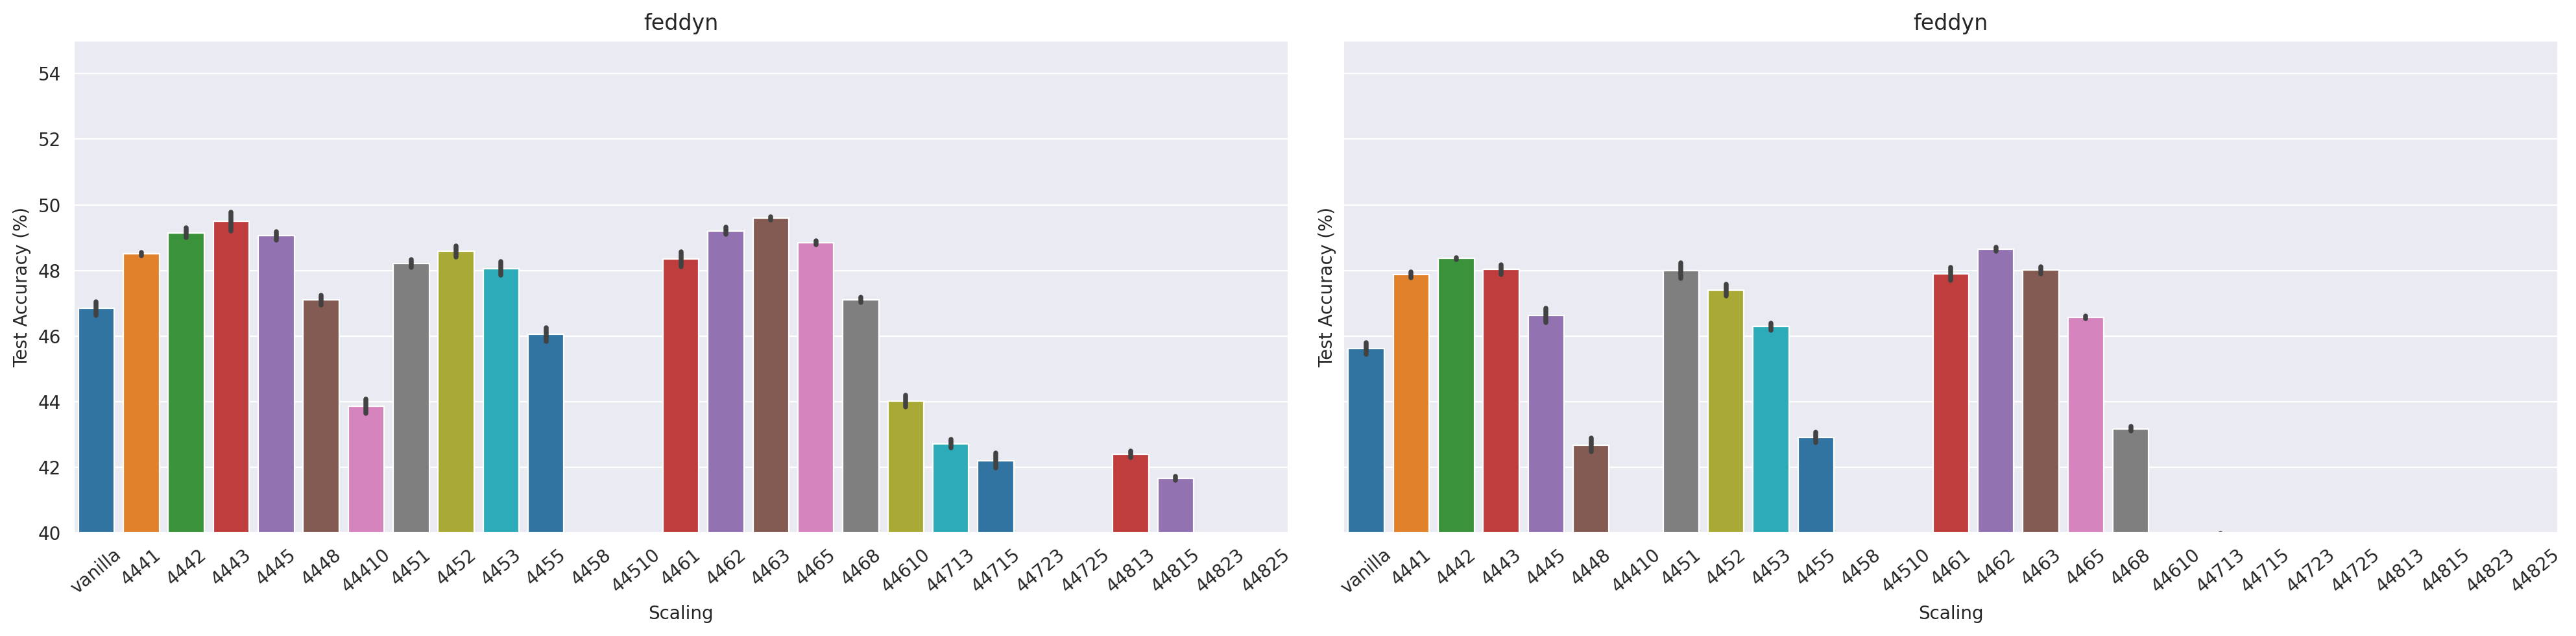

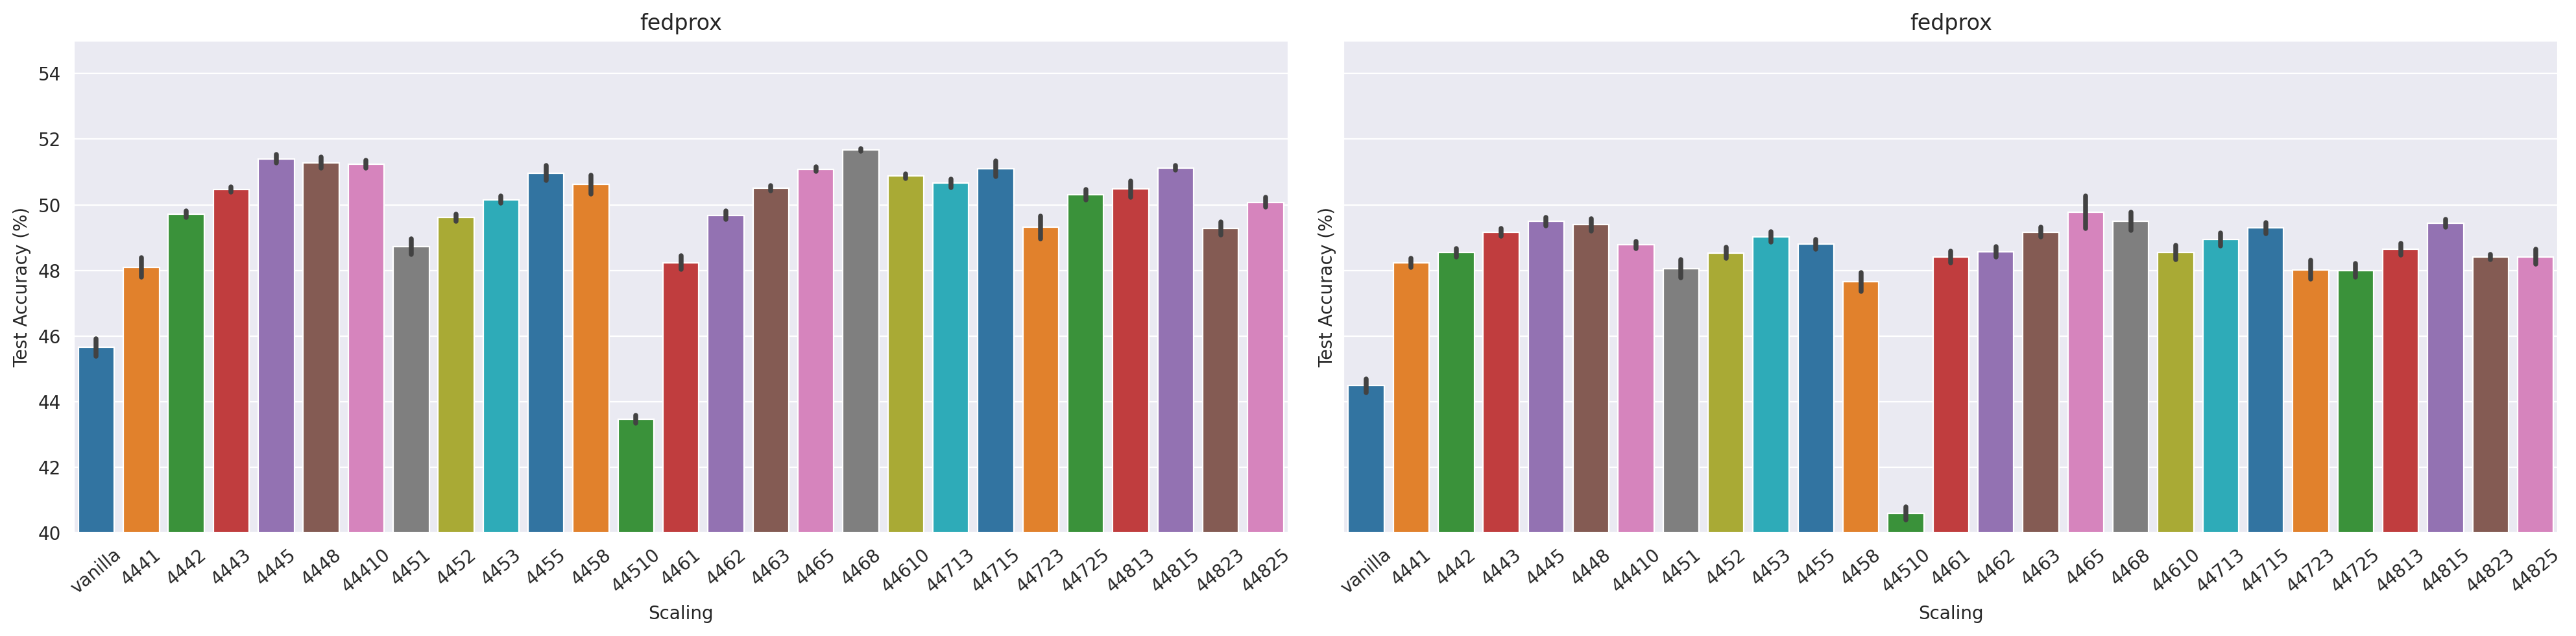

In [5]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

for algo in ["fedavg", "feddyn", "fedprox"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # sk = [0, 0.1, 0.01, 0.001]
        sk = ["vanilla", 4441, 4442, 4443, 4445, 4448, 44410,
            4451, 4452, 4453, 4455, 4458, 44510,
            4461, 4462, 4463, 4465, 4468, 44610,
            44713, 44715, 44723, 44725,
            44813, 44815, 44823, 44825]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([40,55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

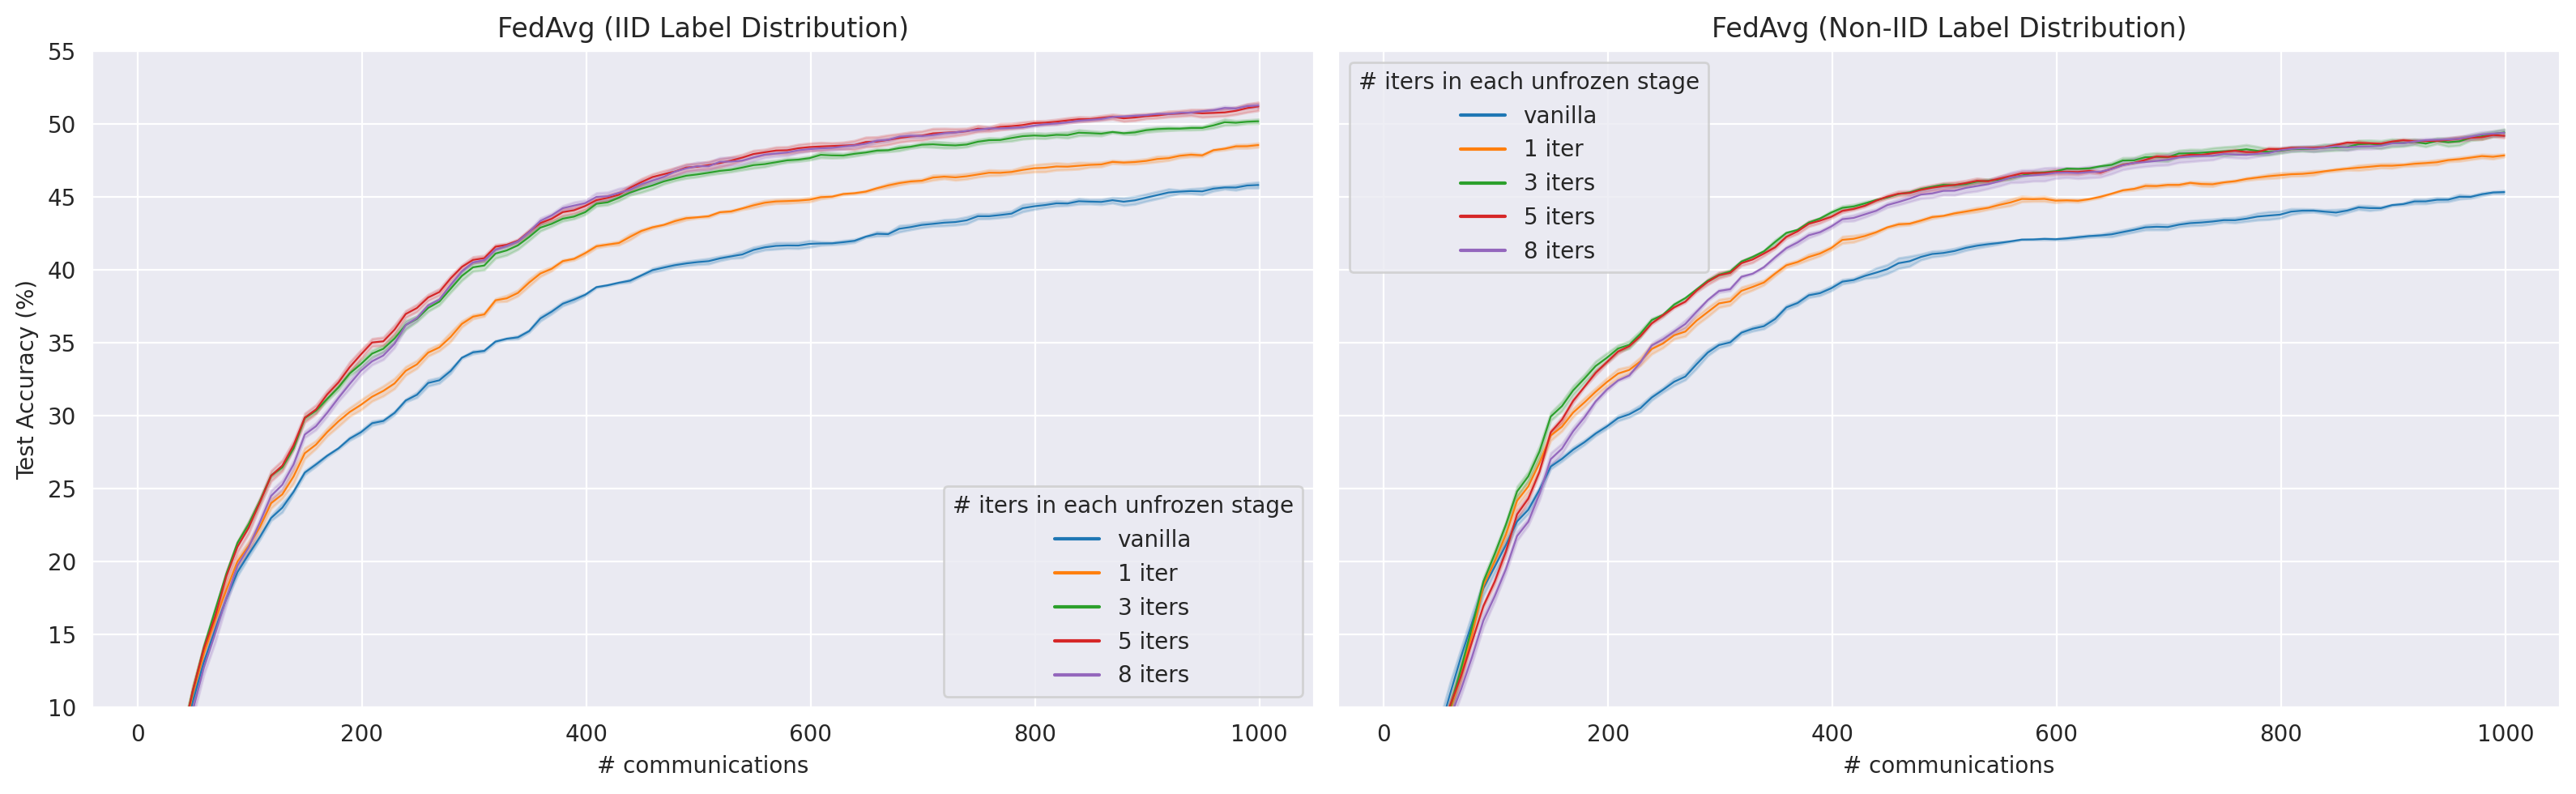

In [6]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

titles = ["FedAvg (IID Label Distribution)", "FedAvg (Non-IID Label Distribution)"]
for algo in ["fedavg", "feddyn", "fedprox"]:
    fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] <= 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        sk = ["vanilla", 4441, 4443, 4445, 4448]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        temp = temp.replace({'Scaling': {4441: '1 iter', 
                                         4443: '3 iters',
                                         4445: '5 iters',
                                         4448: '8 iters',
                                         }})
        temp["# iters in each unfrozen stage"] = temp['Scaling']
        ax = sns.lineplot(data=temp, x="epoch", y="a3", ax=ax, hue="# iters in each unfrozen stage", palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([10,55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(titles[index])
        ax.set_xlabel("# communications")
    fig.tight_layout()
    plt.pause(0.1)

    break

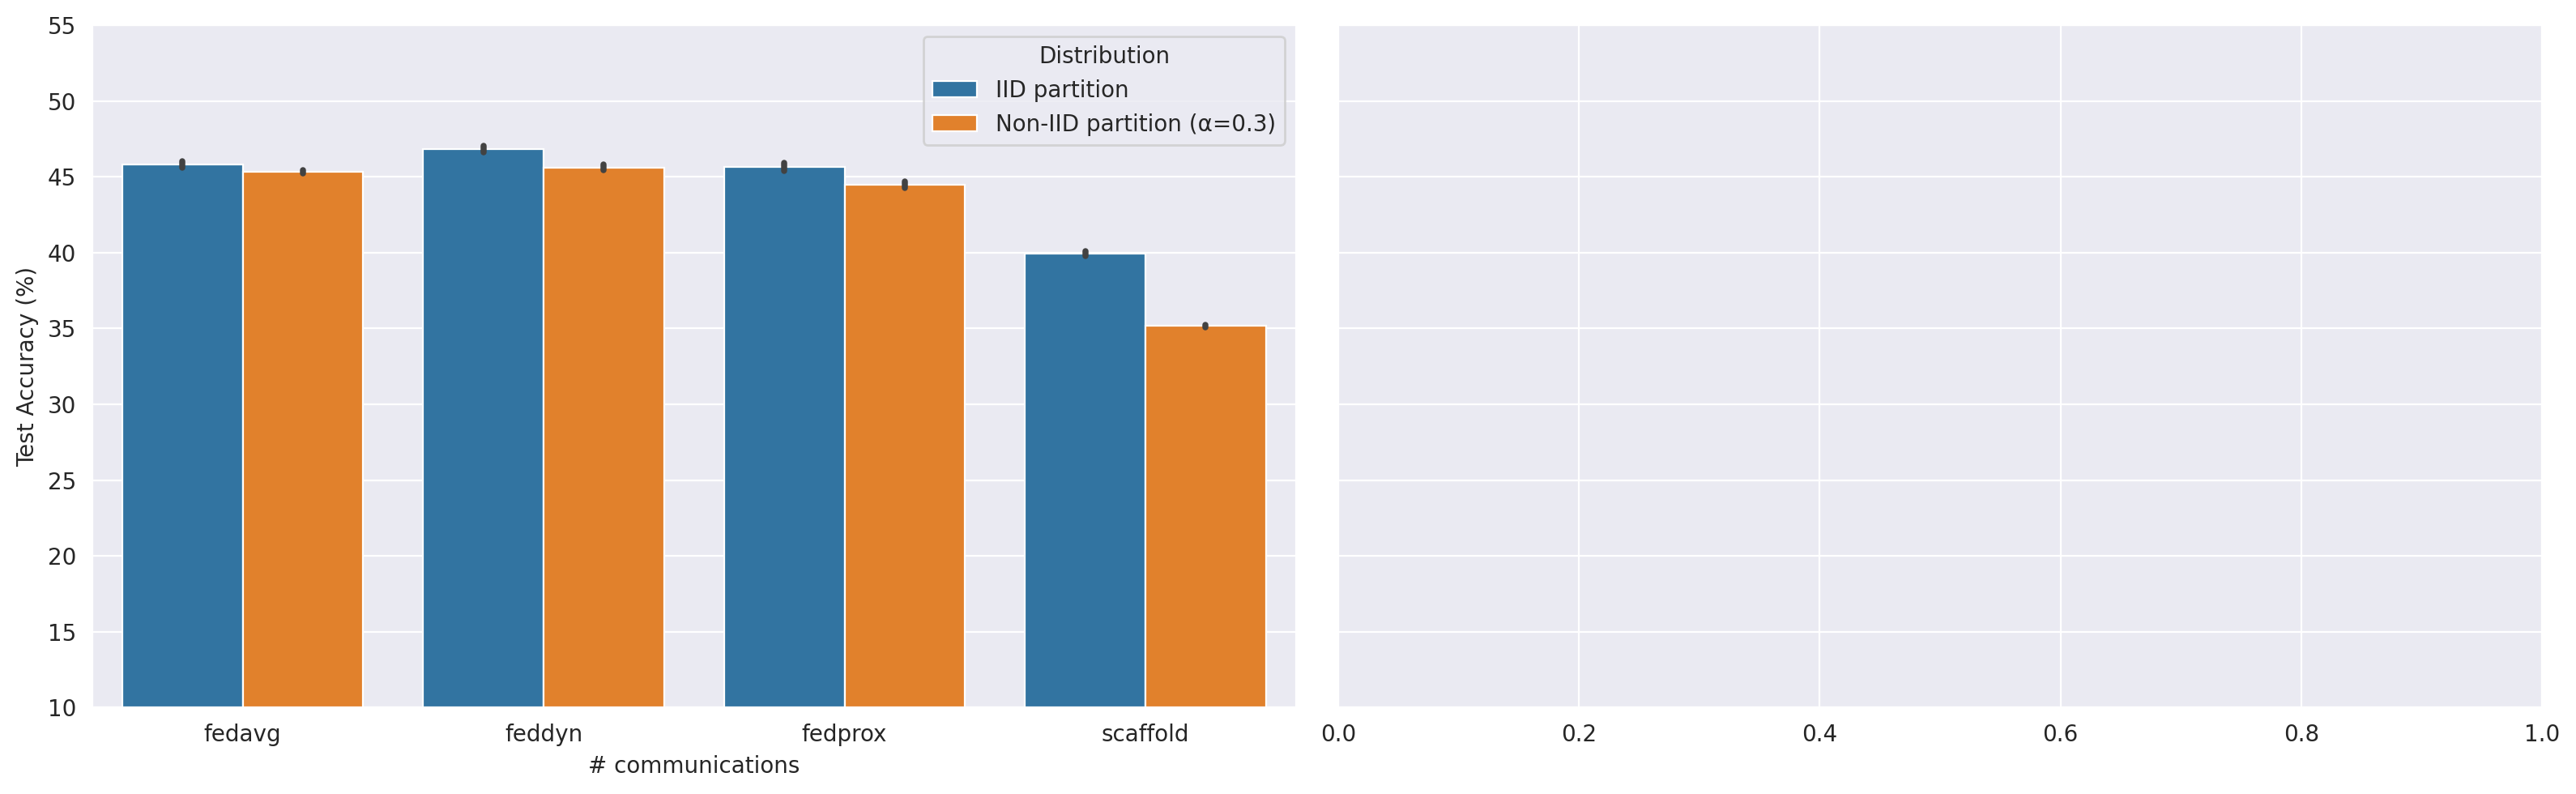

In [7]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.01*/s[1-9].csv")
# data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

titles = ["FedAvg (IID Label Distribution)", "FedAvg (Non-IID Label Distribution)"]
fig, axes = plt.subplots(1, 2, figsize=(16,5), dpi=200, sharey=True)
sns.set_style("darkgrid")
for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
    
    ax = axes[index]
    temp = copy.deepcopy(data_temp)
    temp = temp[temp["act_prob"] == 0.01]
    temp = temp[temp["epoch"] == 999]
    # if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
    # elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
    # temp = temp[(temp["Mode"] == name)]
    sk = ["vanilla"]
    temp = temp.set_index('Scaling').loc[sk].reset_index()
    # temp = temp.replace({'Scaling': {4441: '1 iter', 
    #                                     4443: '3 iters',
    #                                     4445: '5 iters',
    #                                     4448: '8 iters',
    #                                     }})
    # temp["# iters in each unfrozen stage"] = temp['Scaling']
    ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Distribution", palette="tab10", errorbar="se", linewidth = 0.8)
    ax.set_ylim([10,55])
    ax.set_ylabel("Test Accuracy (%)")
    # ax.set_title(titles[index])
    ax.set_xlabel("# communications")

    break
fig.tight_layout()
plt.pause(0.1)

In [8]:

ax.legend(labels=["vanilla", "1 iteration", "3 iteration", "5 iteration", "8 iteration"])

## CIFAR100 + P = 0.1

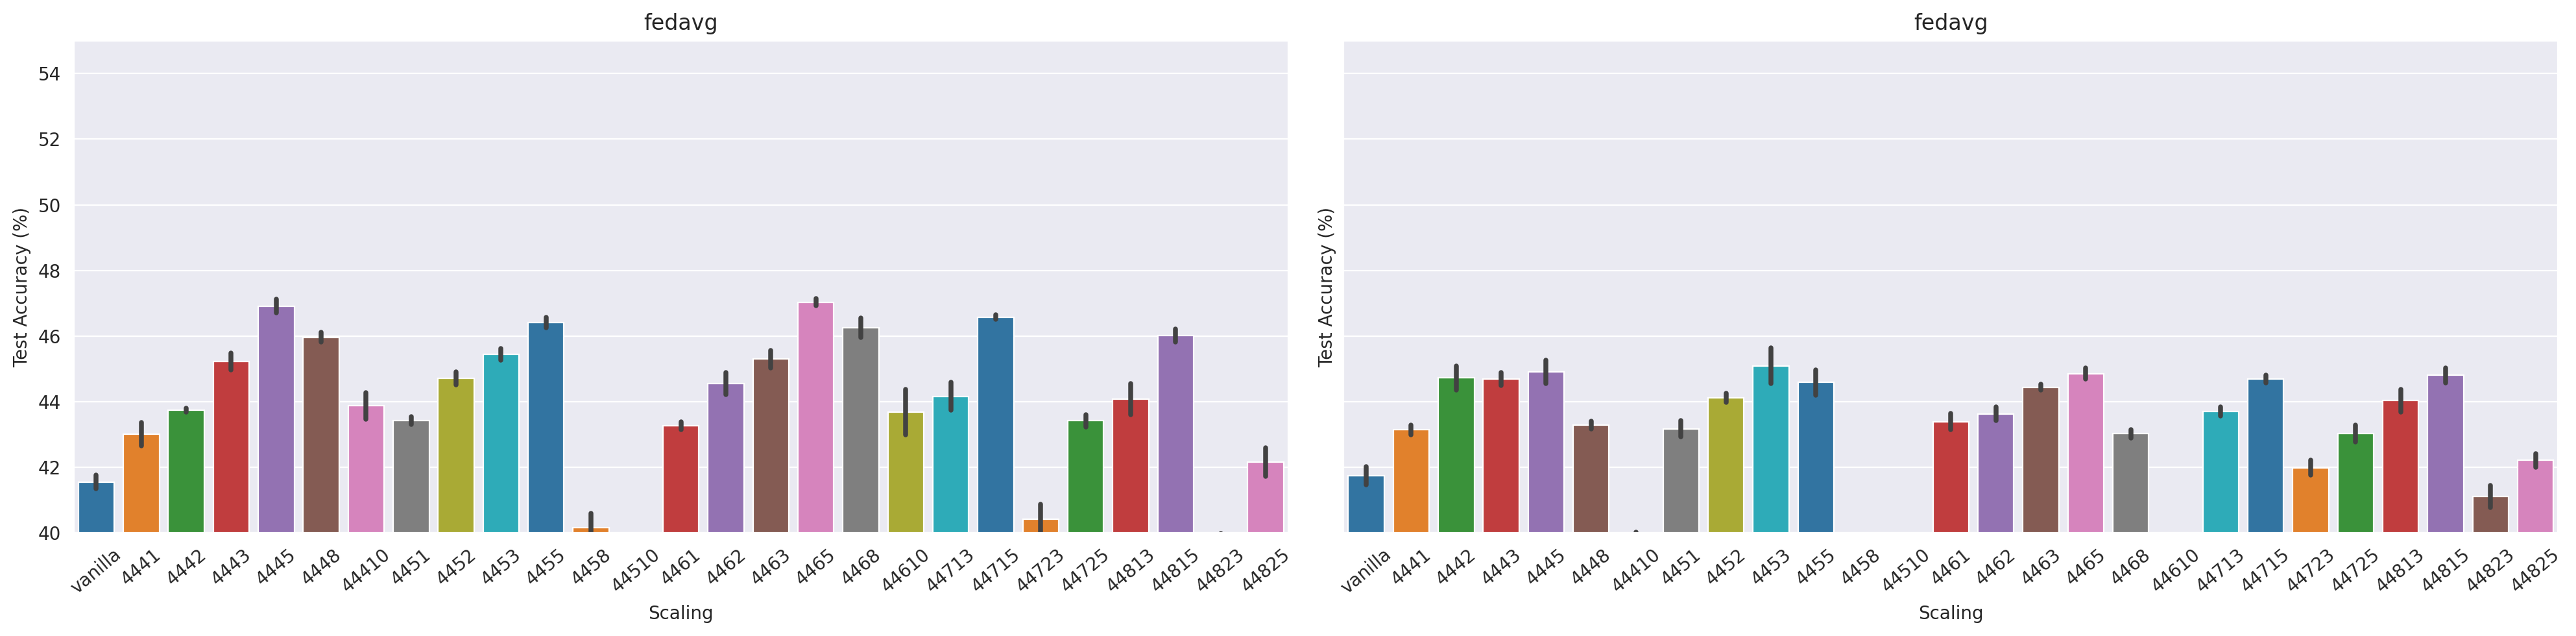

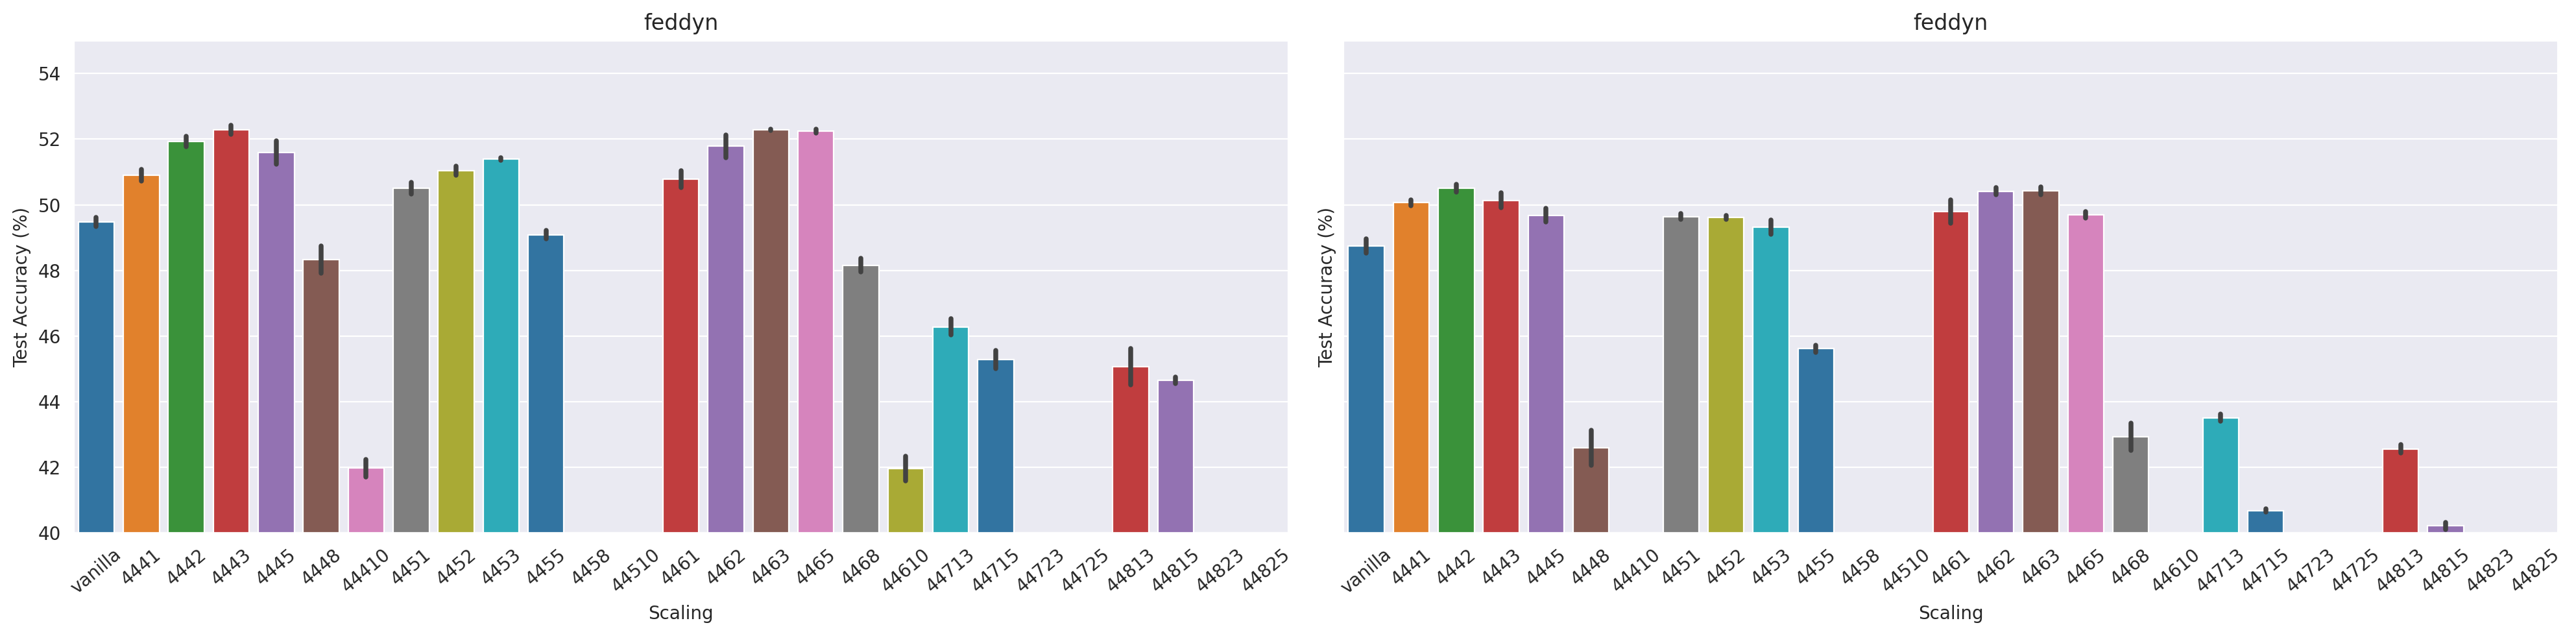

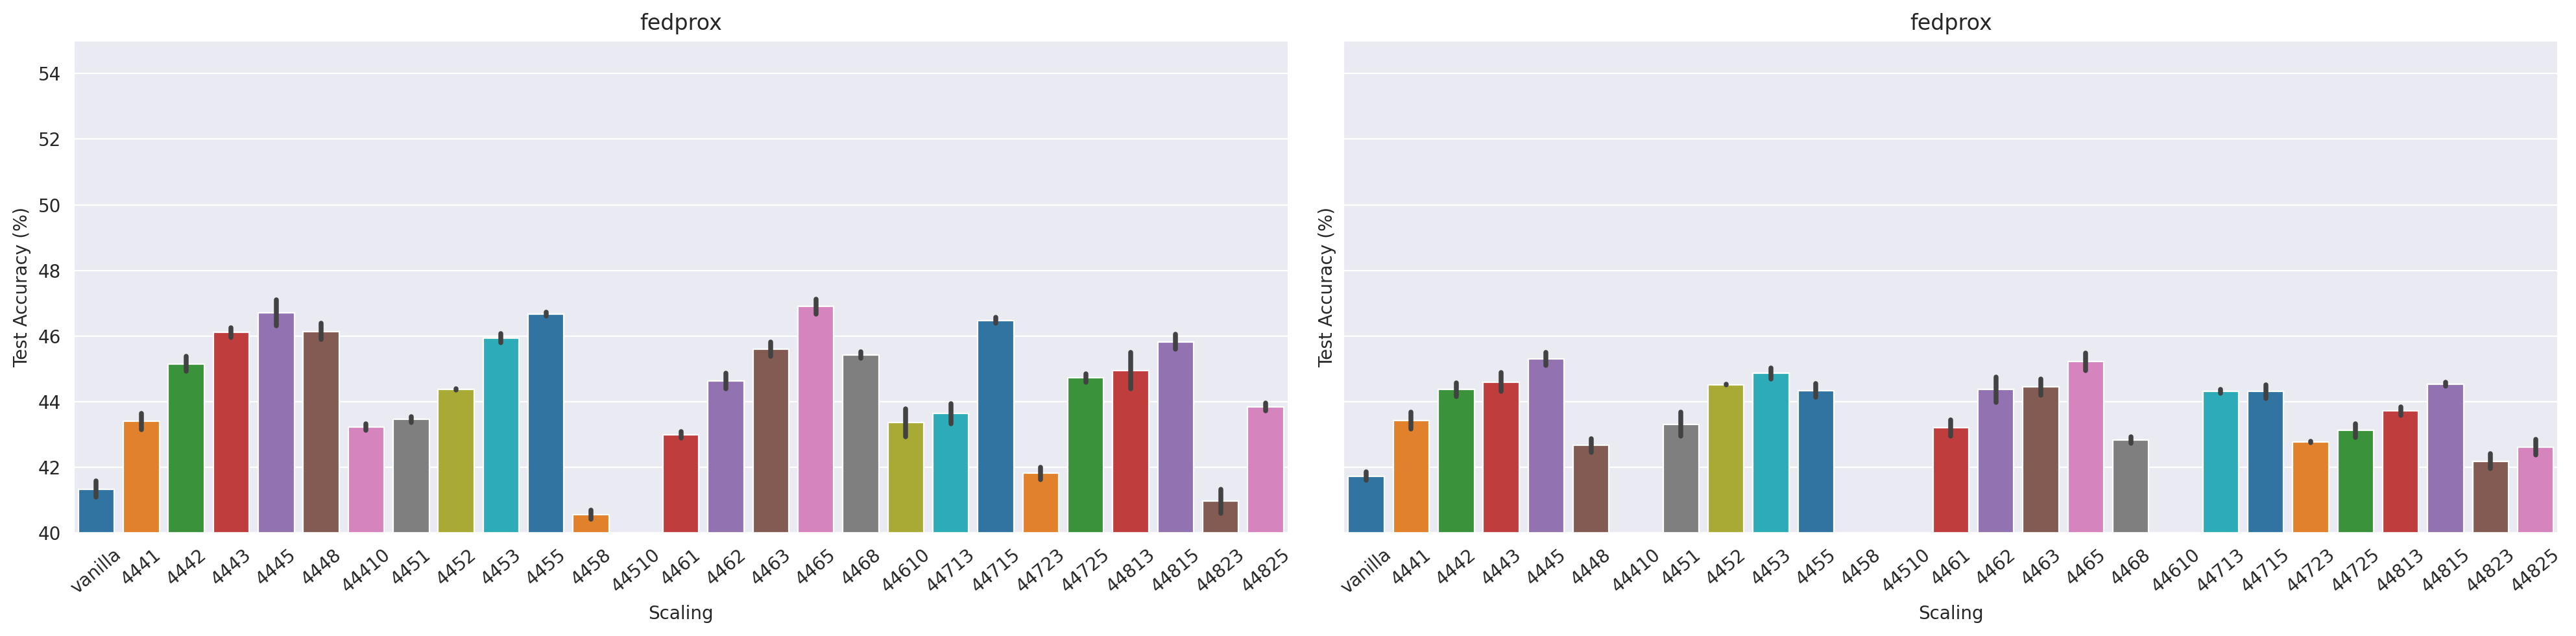

In [9]:
data_temp = load_data("../Output/CIFAR100-*-N100-P0.1*/s[1-9].csv")

for algo in ["fedavg", "feddyn", "fedprox"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.1]
        temp = temp[temp["epoch"] == 499]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # sk = [0, 0.1, 0.01, 0.001]
        sk = ["vanilla", 4441, 4442, 4443, 4445, 4448, 44410,
            4451, 4452, 4453, 4455, 4458, 44510,
            4461, 4462, 4463, 4465, 4468, 44610,
            44713, 44715, 44723, 44725, 
            44813, 44815, 44823, 44825]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([40,55])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

## CIFAR10 + P: 0.01

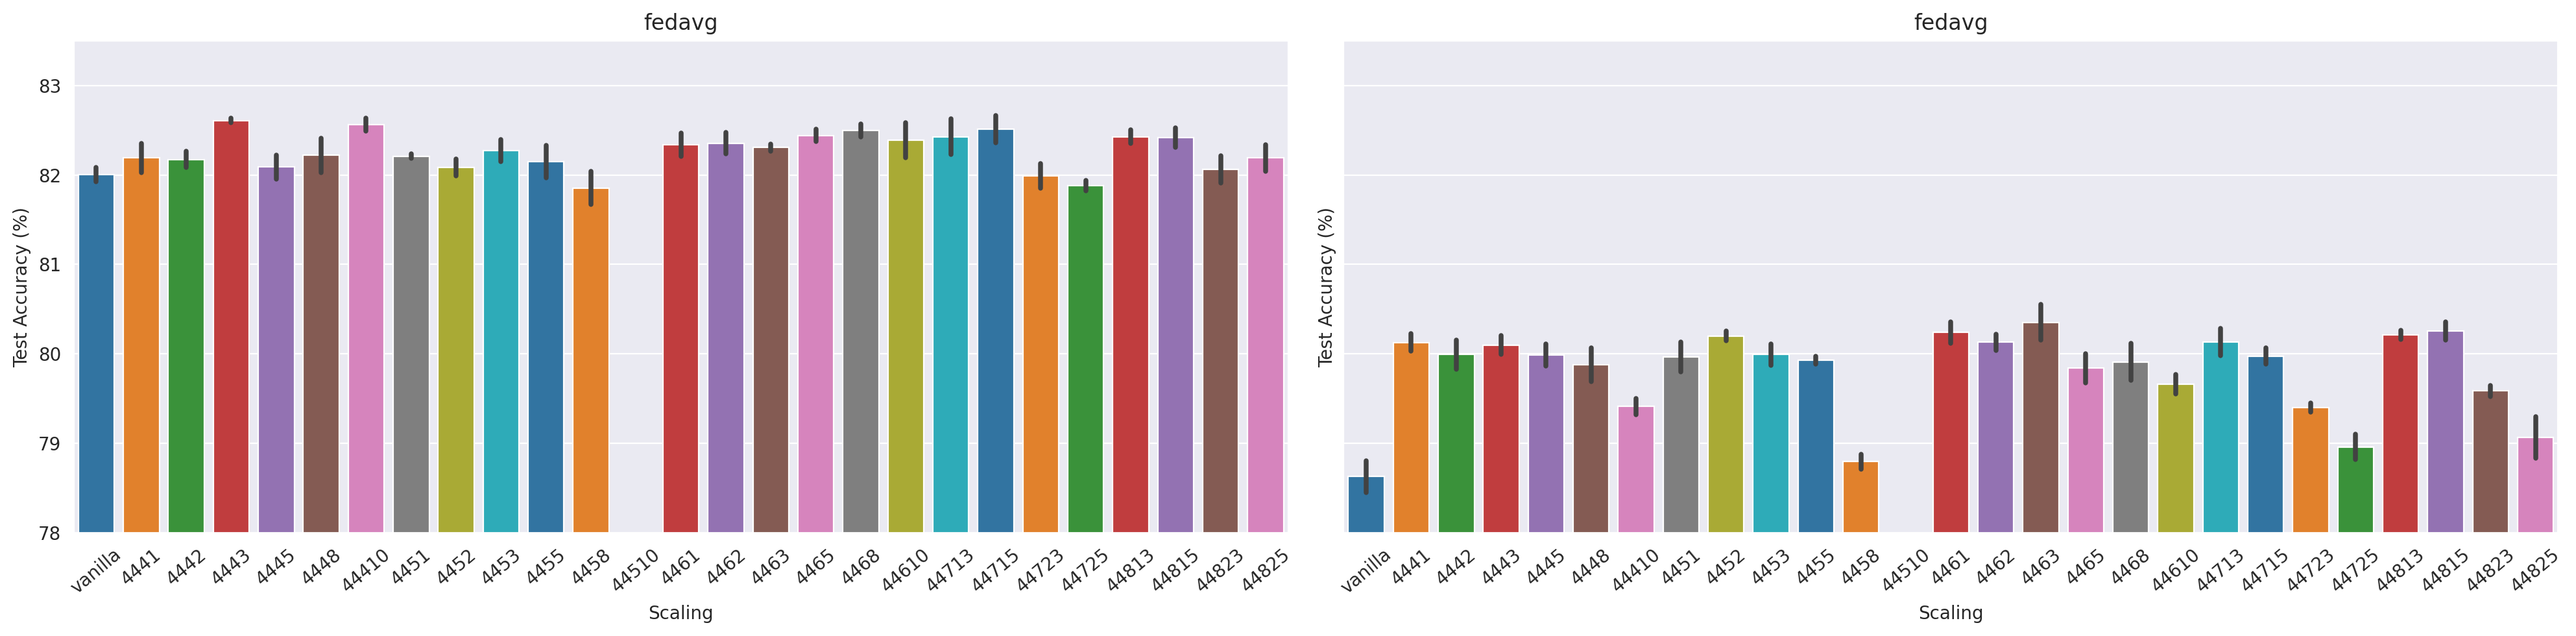

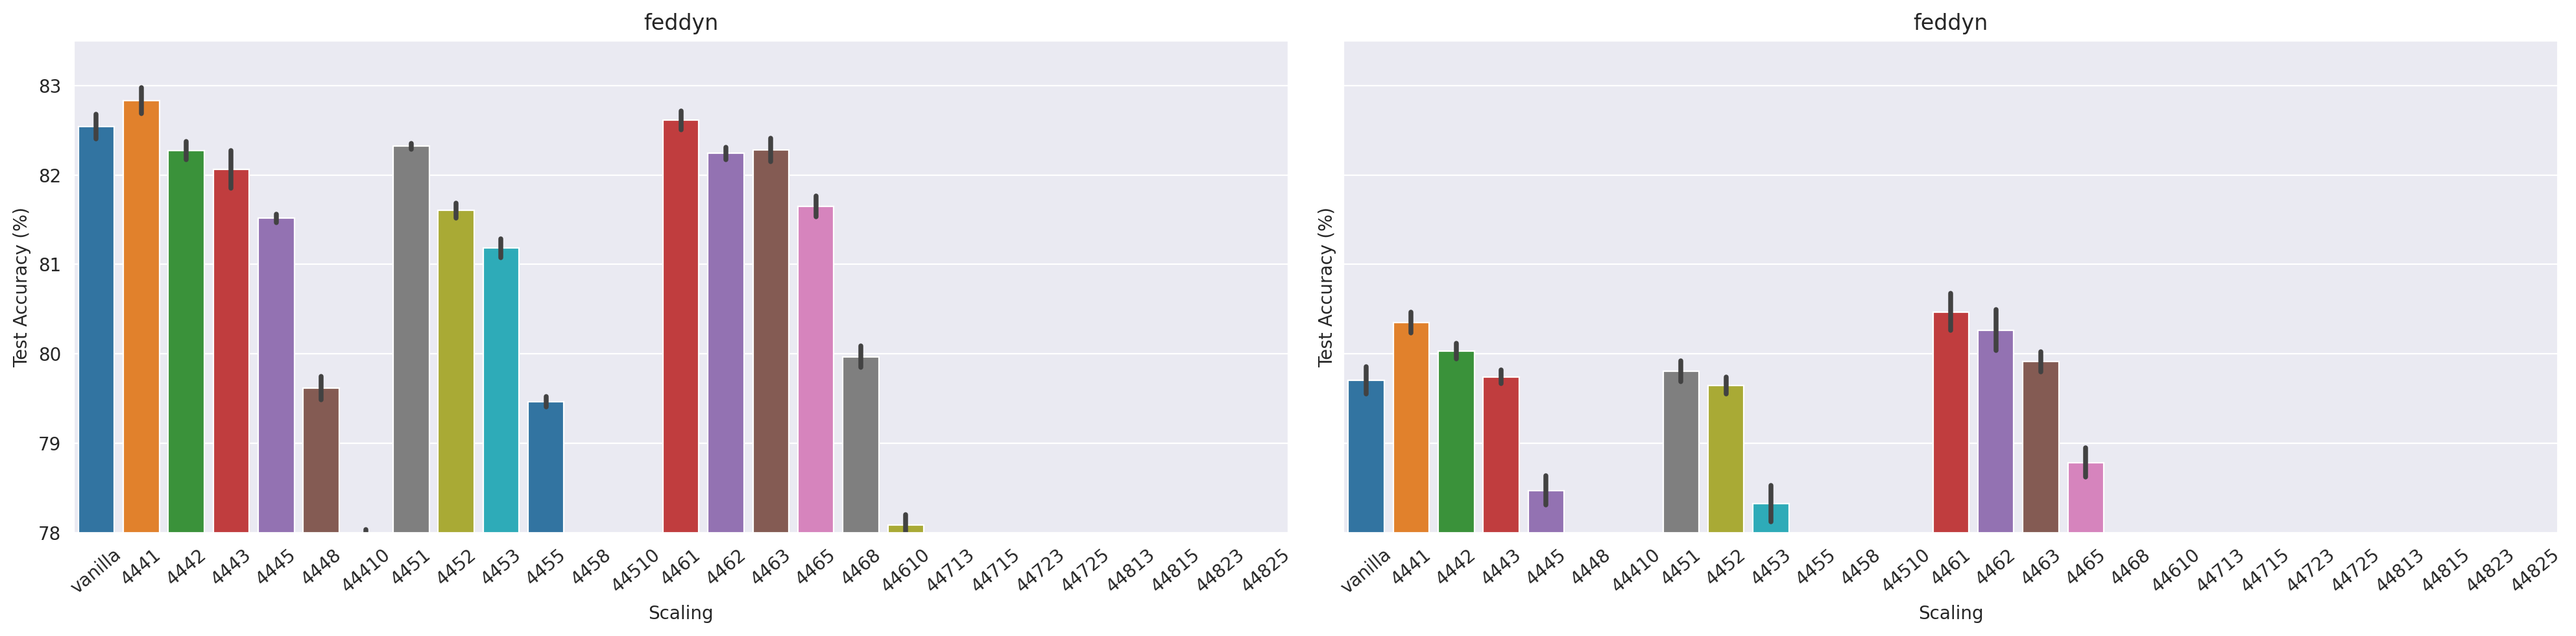

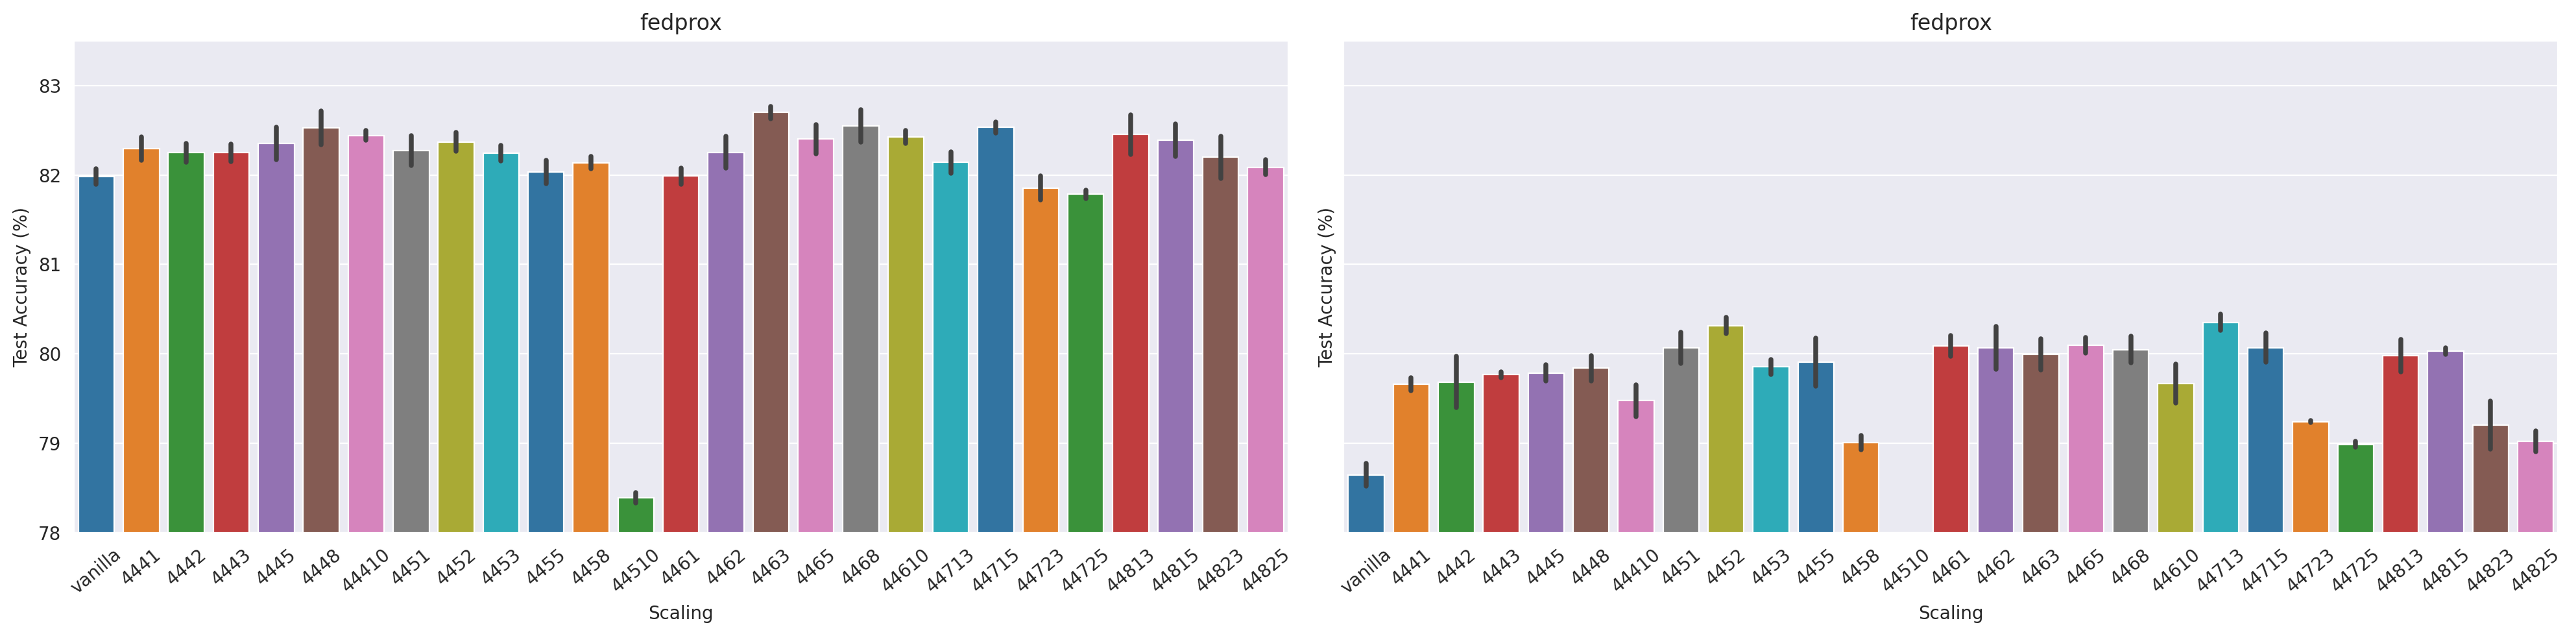

In [10]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

for algo in ["fedavg", "feddyn", "fedprox"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == 999]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # sk = [0, 0.1, 0.01, 0.001]
        sk = ["vanilla", 4441, 4442, 4443, 4445, 4448, 44410,
            4451, 4452, 4453, 4455, 4458, 44510,
            4461, 4462, 4463, 4465, 4468, 44610,
            44713, 44715, 44723, 44725, 
            44813, 44815, 44823, 44825]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 83.5])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

In [11]:
# CIFAR10 + P: 0.1

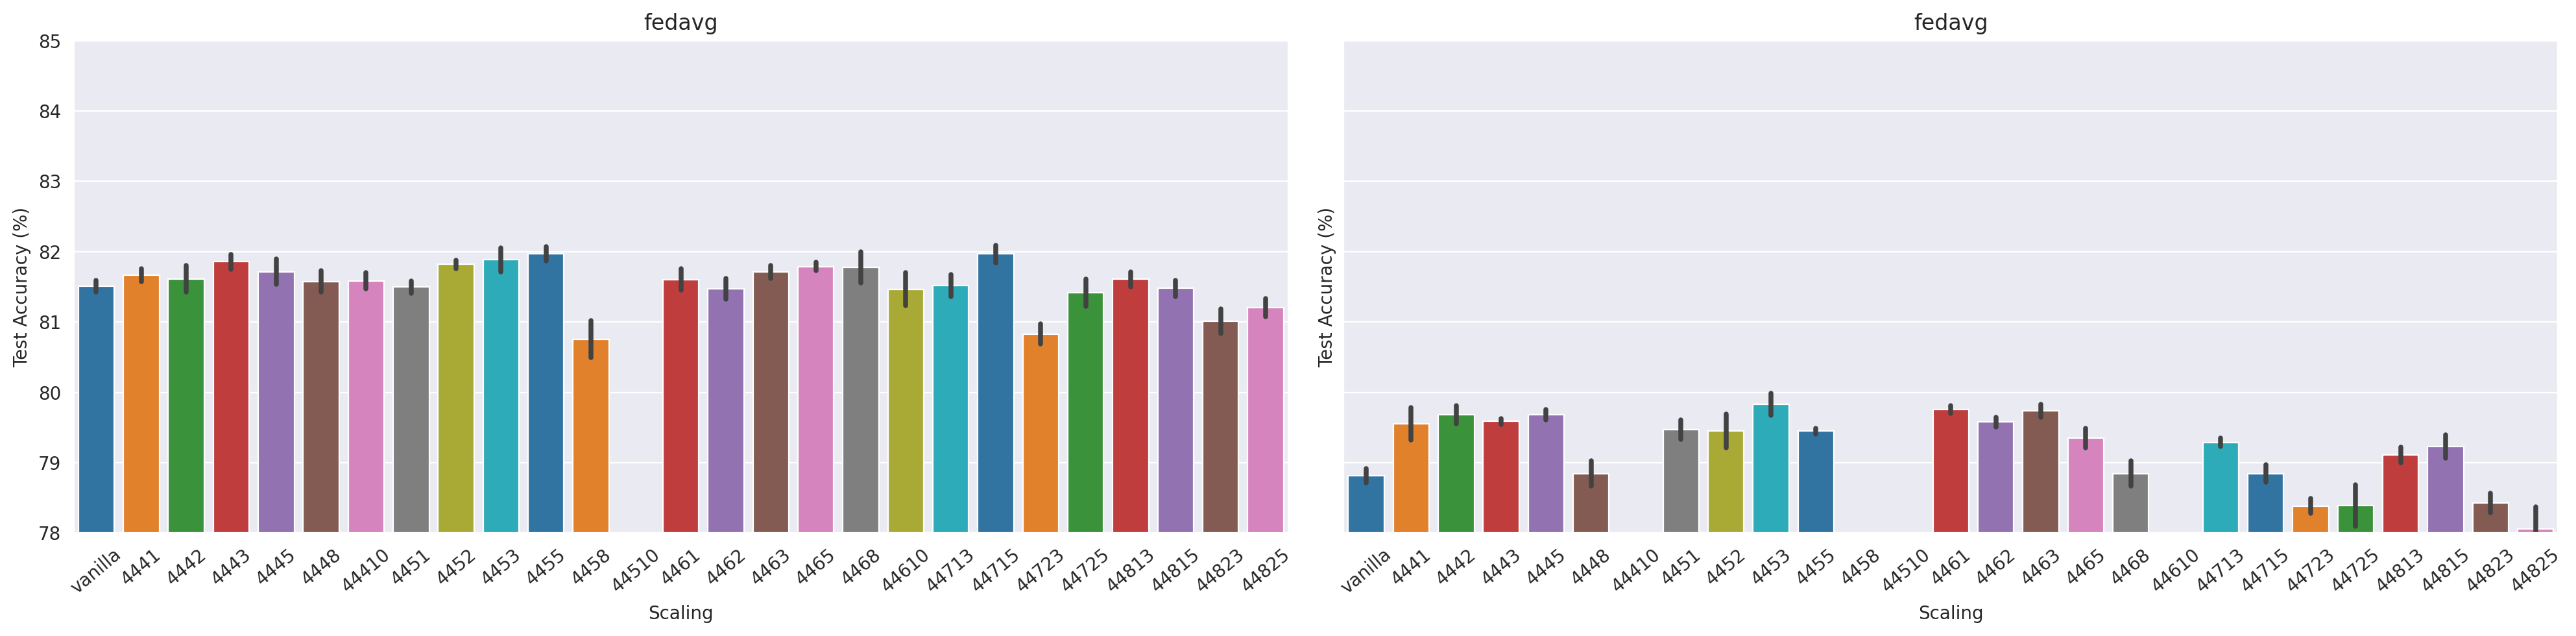

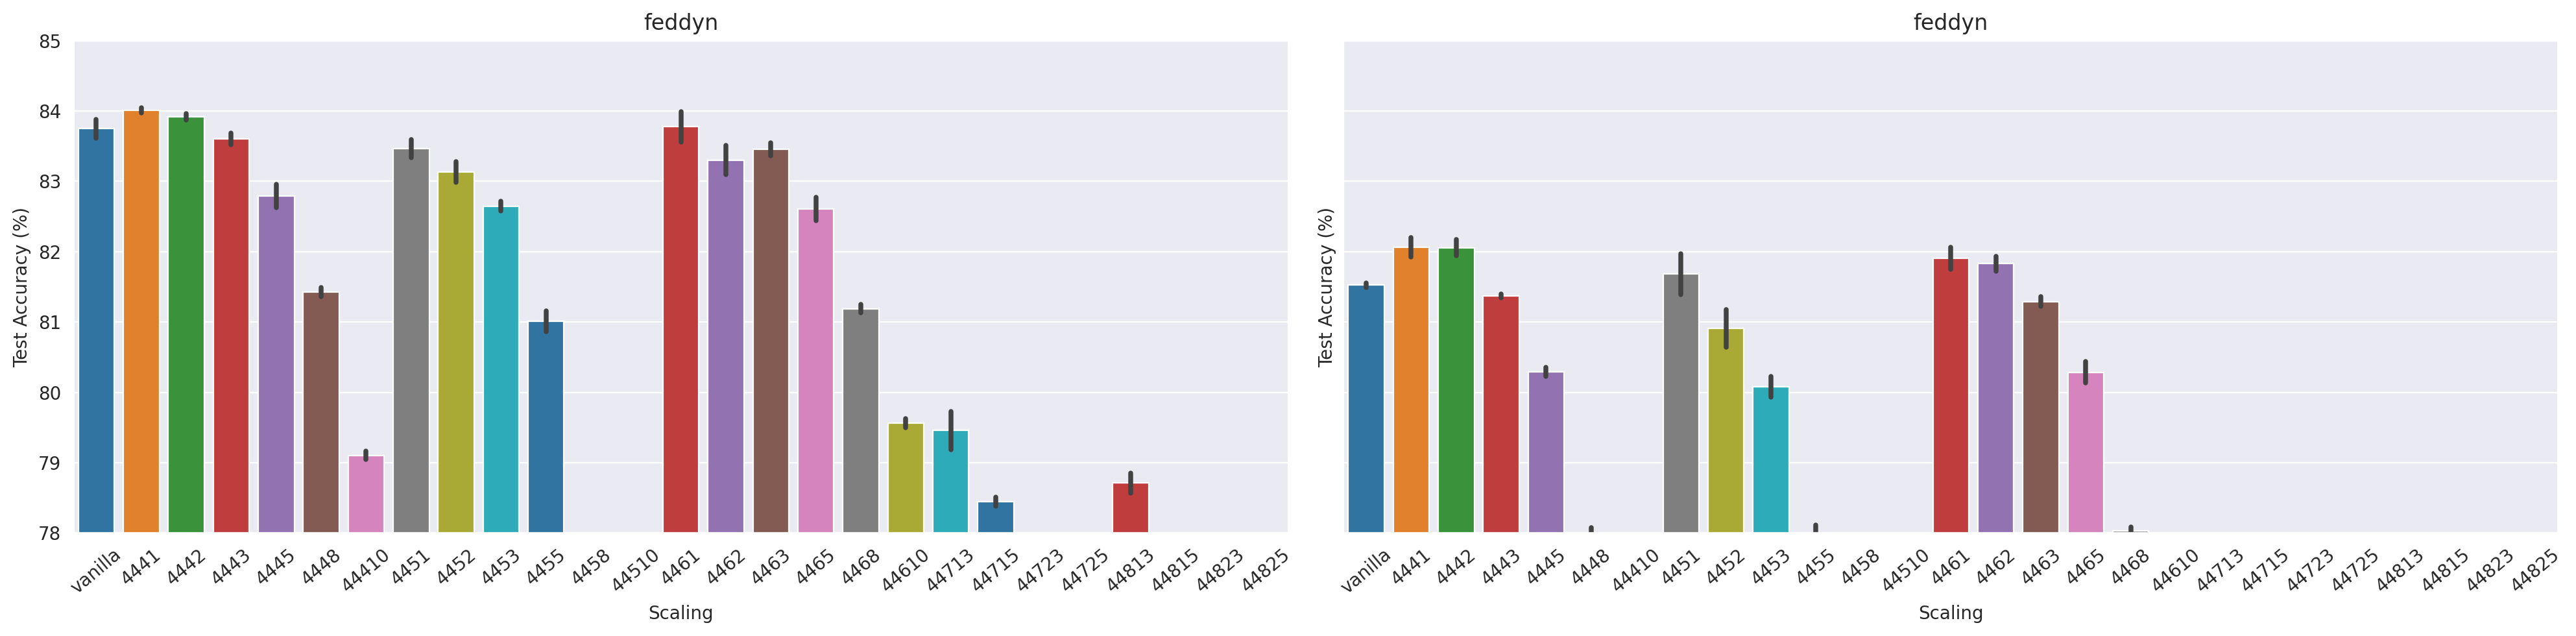

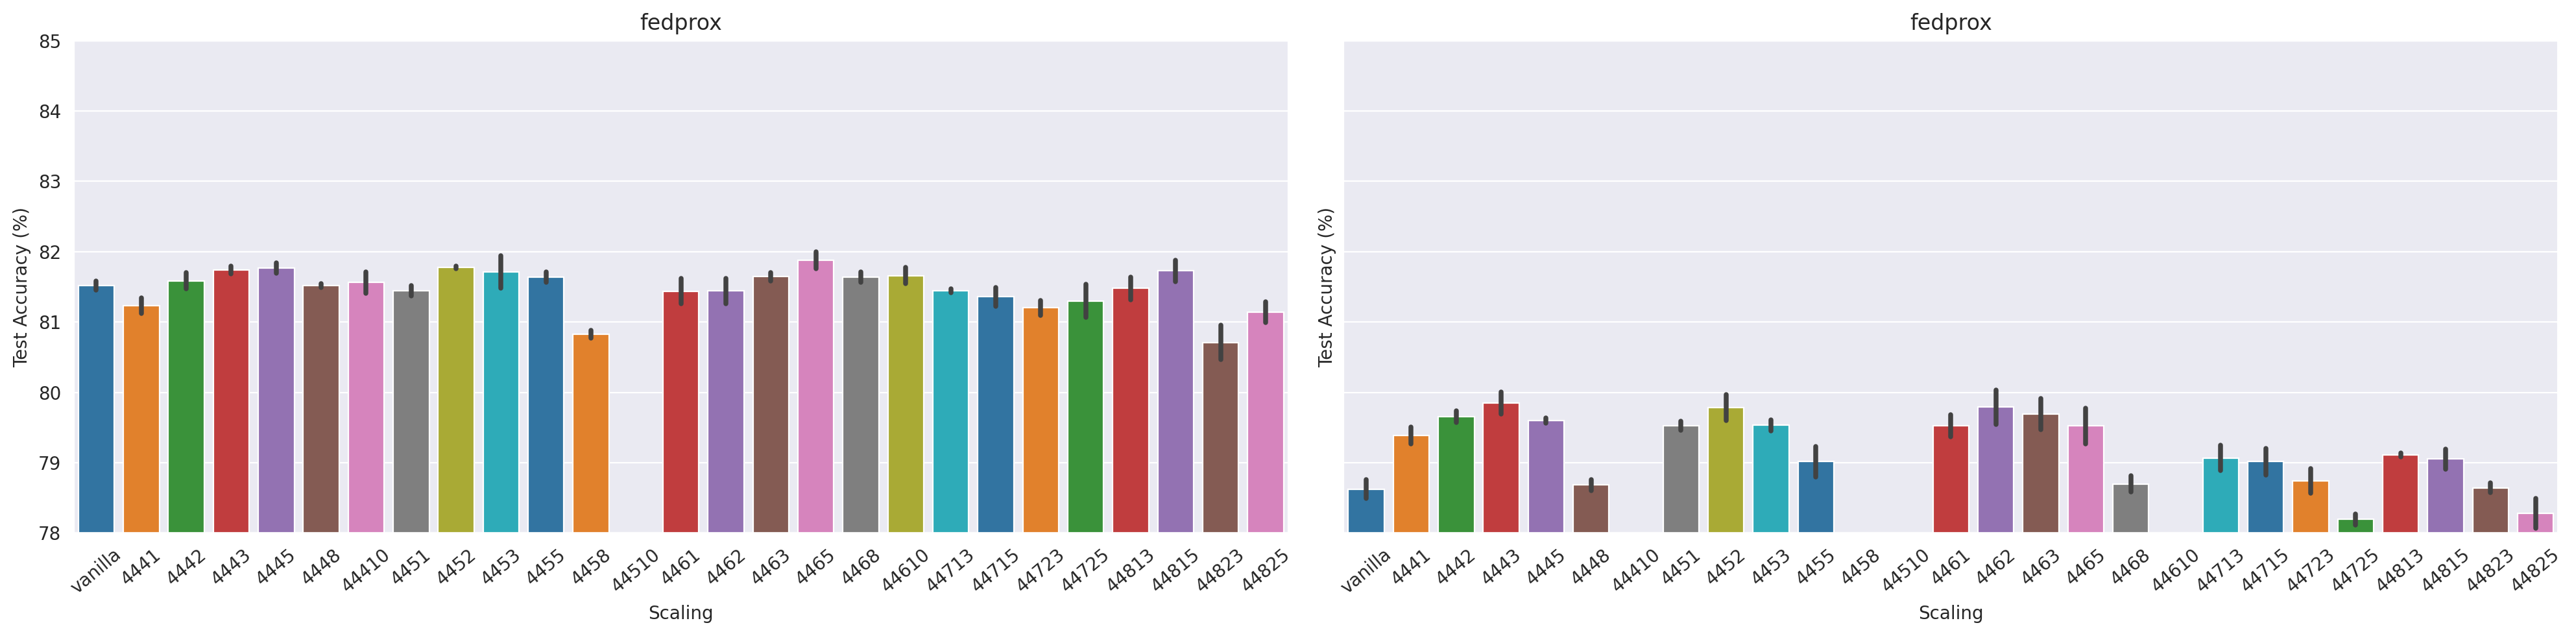

In [12]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.1*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

for algo in ["fedavg", "feddyn", "fedprox"]:
    fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.1]
        temp = temp[temp["epoch"] == 499]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # sk = [0, 0.1, 0.01, 0.001]
        sk = ["vanilla", 4441, 4442, 4443, 4445, 4448, 44410,
            4451, 4452, 4453, 4455, 4458, 44510,
            4461, 4462, 4463, 4465, 4468, 44610,
            44713, 44715, 44723, 44725, 
            44813, 44815, 44823, 44825]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([78, 85])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

## The early and late stage of CIFAR10

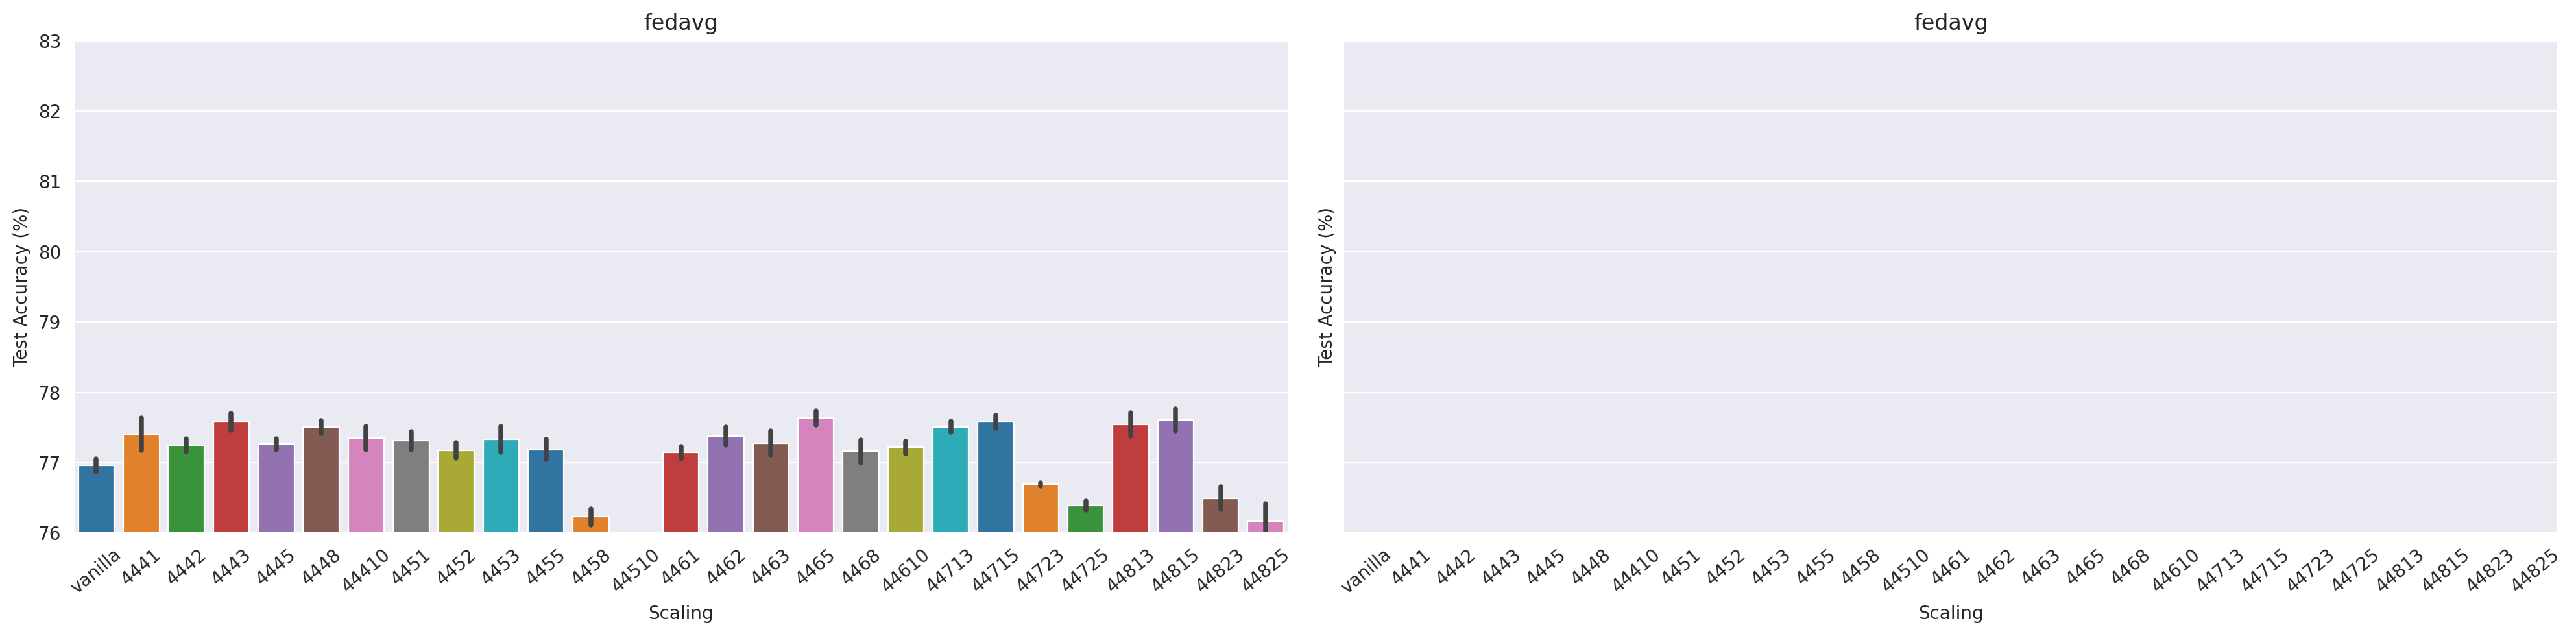

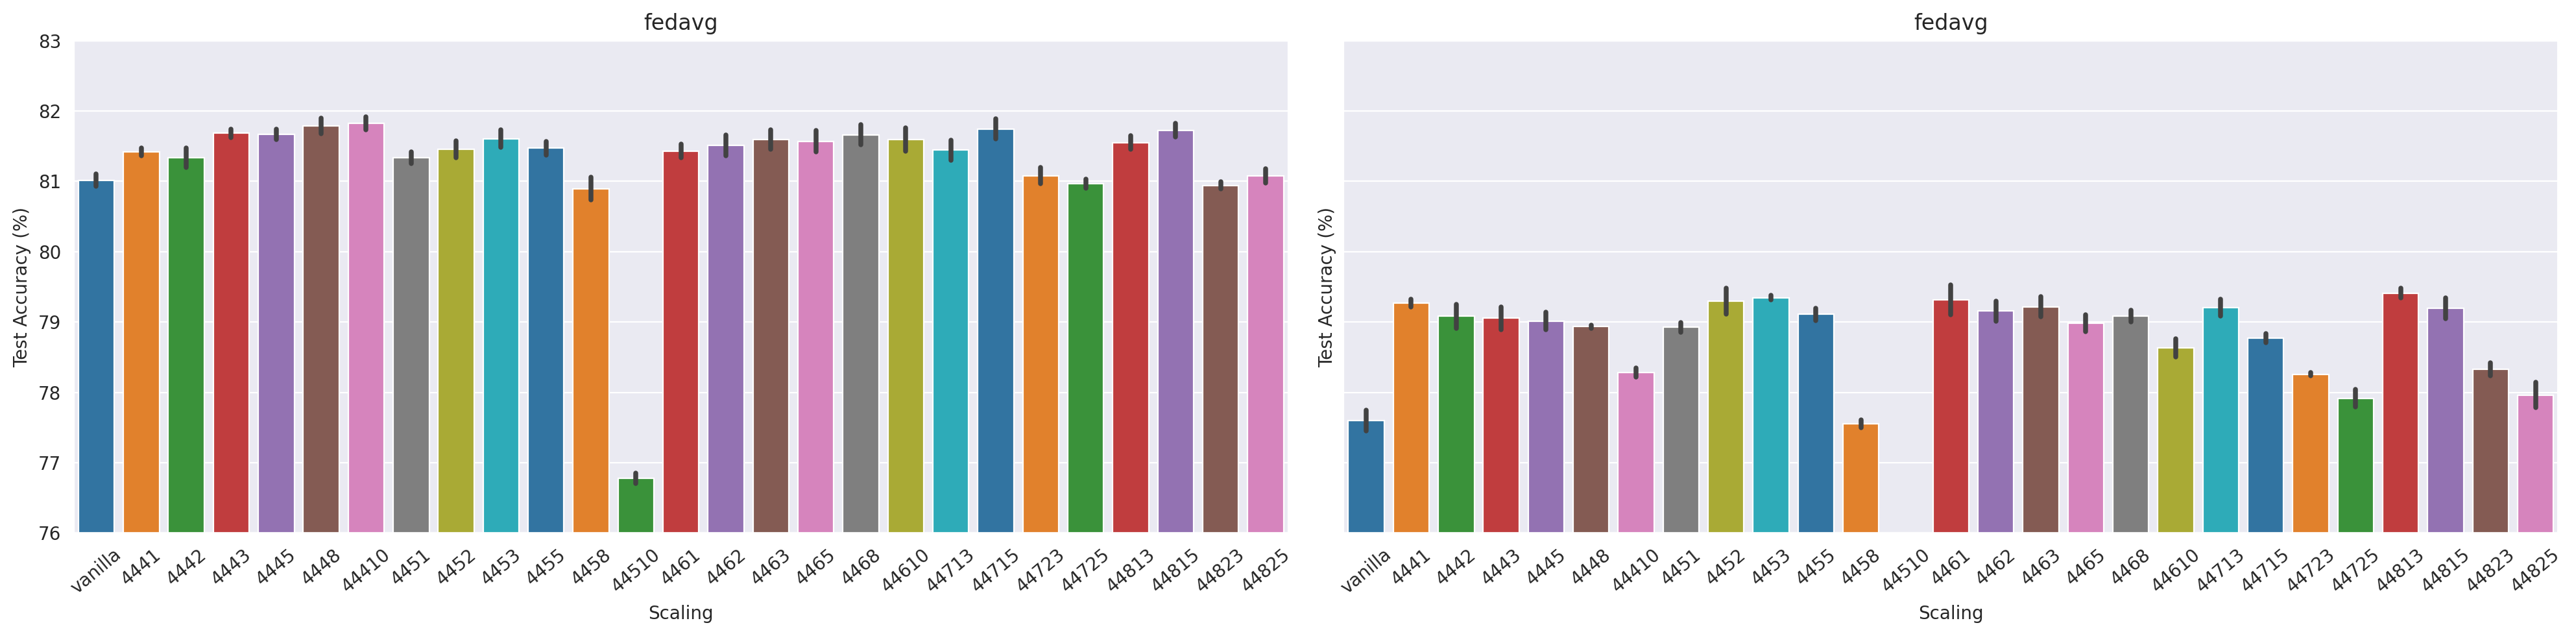

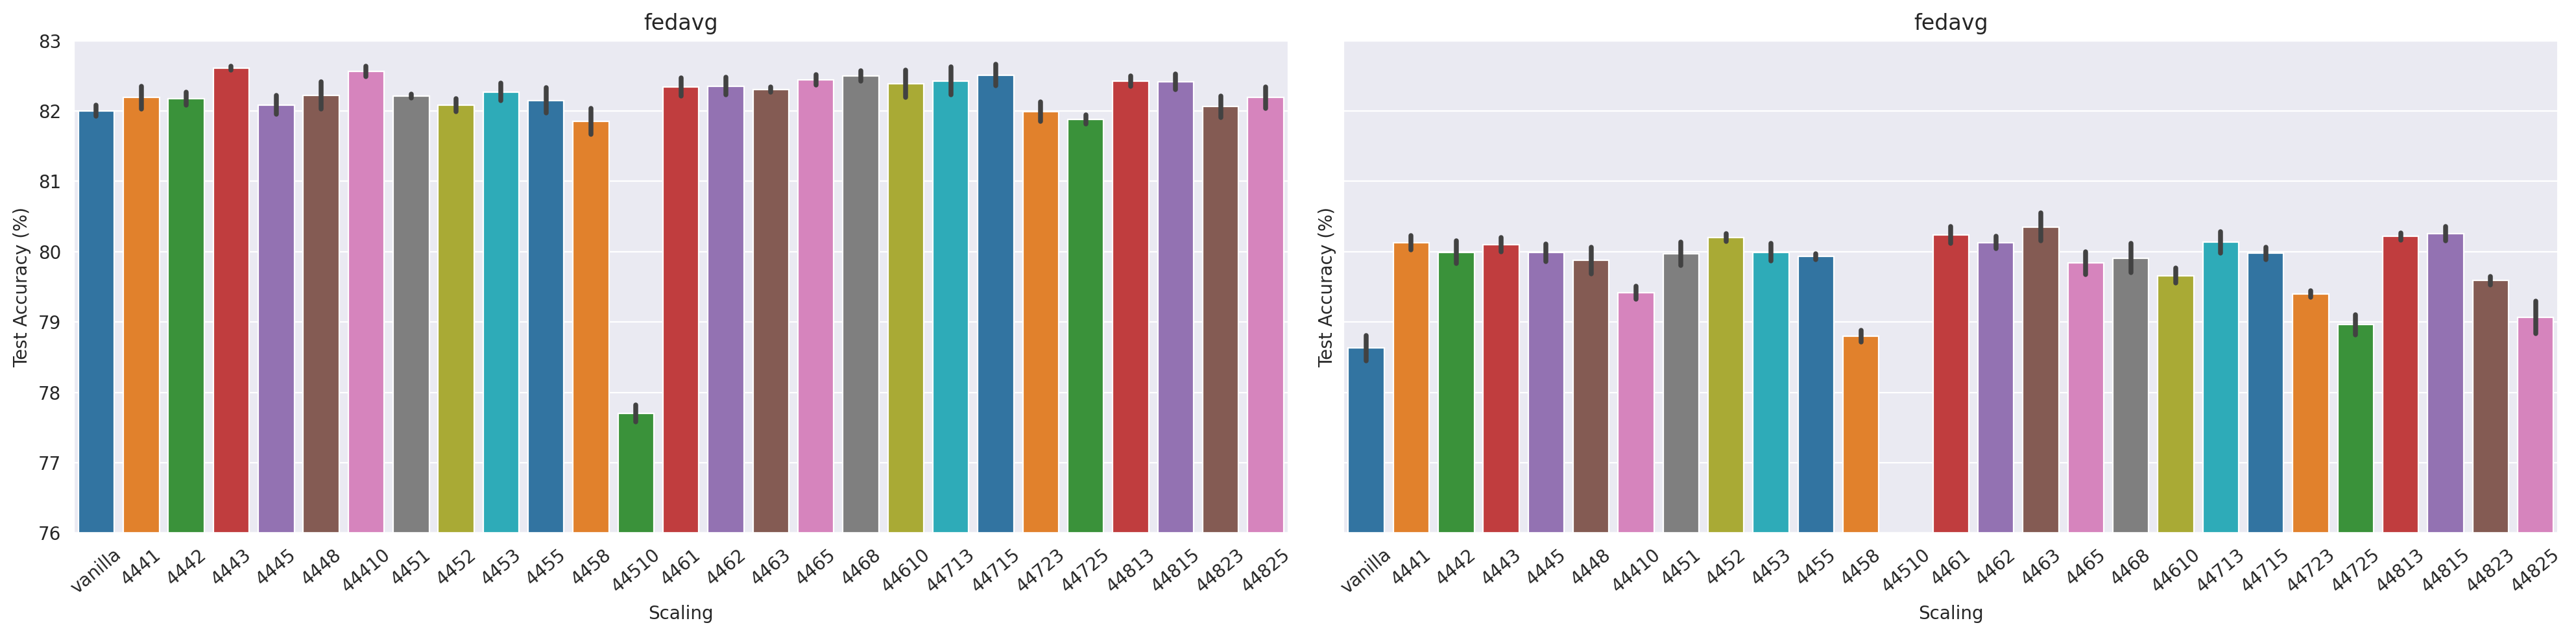

In [13]:
data_temp = load_data("../Output/CIFAR10-*-N100-P0.01*/s[1-9].csv")
data_temp2 = load_data("../Output/CIFAR10noBN2-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

for algo, epoch in zip(["fedavg", "fedavg", "fedavg"], [299, 699, 999]):
    fig, axes = plt.subplots(1, 2, figsize=(20,5), dpi=200, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0, 0.3]):
        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["epoch"] == epoch]
        if iid == 0.: temp = temp[(temp["Distribution"] == "IID partition")]
        elif iid == 0.3: temp = temp[(temp["Distribution"] != "IID partition")]
        temp = temp[(temp["Mode"] == name)]
        # sk = [0, 0.1, 0.01, 0.001]
        sk = ["vanilla", 4441, 4442, 4443, 4445, 4448, 44410,
            4451, 4452, 4453, 4455, 4458, 44510,
            4461, 4462, 4463, 4465, 4468, 44610,
            44713, 44715, 44723, 44725, 
            44813, 44815, 44823, 44825]
        temp = temp.set_index('Scaling').loc[sk].reset_index()
        ax = sns.barplot(data=temp, x="Scaling", y="a3", ax=ax, palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([76, 83])
        ax.set_ylabel("Test Accuracy (%)")
        ax.set_title(name)
        # ax.set_xlabel("# communications")
        ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
    fig.tight_layout()
    plt.pause(0.1)

In [3]:
(111.99*100)%100/100

0.99